In [1]:
from tile_class import TileOperations
from helper import get_s0_s1


class grid_info:
    x = 60
    y = 110
    length = 1
    shape = (int(x / length), int(y / length))


tiles_dir = "/home/bota/Downloads/projtiles1/"
gps_csv = "/home/bota/Desktop/active_sensing/data/gpstiles.csv"
row_imgs_dir = "/media/bota/BOTA/wheat/APPEZZAMENTO_PICCOLO/"
tile_ops = TileOperations(tiles_dir, gps_csv, row_imgs_dir)
ground_truth_map = tile_ops.groundtruth_tiles(grid_info, cache_dir="cache")

Loading cached field from cache/field_tiles_60x110.pkl


In [2]:
# altitudes = [5.41, 10.83, 16.24, 21.65, 27.06, 32.48]
altitudes=[ 6.5  12.99 19.49 25.98 32.48 38.97]
altitude = altitudes[1]
true_matrix = ground_truth_map[0:20, 10:20]
conf_mat, (s0, s1) = get_s0_s1(true_matrix, altitude, e=0.3)

alt h: 10.83
dict content: dict_keys(['6.5', '12.99', '19.49', '25.98', '32.48', '38.97'])


KeyError: '10.83'

In [16]:
conf_mat

array([[0.85, 0.13],
       [0.15, 0.87]])

/tmp/ipykernel_7231/1310960355.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 500x300 with 0 Axes>

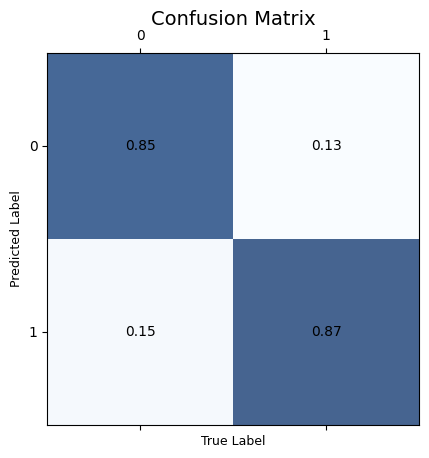

In [17]:
from matplotlib import pyplot as plt
import numpy as np

classes = ["0", "1"]
matrix = conf_mat

plt.figure(figsize=(5, 3))  # Set figure size
cax = plt.matshow(matrix, cmap="Blues", alpha=0.75)

for (i, j), val in np.ndenumerate(matrix):
    plt.text(j, i, f"{val}", ha="center", va="center", color="black")

plt.xticks(ticks=np.arange(len(classes)), labels=classes, fontsize=10)
plt.yticks(ticks=np.arange(len(classes)), labels=classes, fontsize=10)
plt.xlabel("True Label", fontsize=9)
plt.ylabel("Predicted Label", fontsize=9)

plt.title("Confusion Matrix", fontsize=14, pad=20)
plt.tight_layout()
plt.show()